<a href="https://colab.research.google.com/github/YooJi0/BDA71700-Machine-Learning/blob/main/ML_TermProject_2023315075_%EC%9C%A0%EC%A7%80%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DBSCAN 알고리즘**
#### Density-Based Spatial Clustering of Applications with Noise
#### 밀도 기반의 공간 클러스터링 알고리즘
#### 데이터 밀집 지역을 하나의 클러스터로 그룹화하고, 밀집되지 않은 지역을 Noise로 처리

## **용어 정리**

#### **[데이터]**
##### D = {x1, x2, ..., xn}

#### **[Core point, Core objcet]**
##### 핵심 포인트는 주변에 최소 포인트 수(MinPts) 이상의 이웃이 있고, 주어진 반경 ε (엡실론) 내에 위치하는 데이터 포인트

#### **[ε-이웃 지역]**
##### xi ∈ D에 대해, ε-이웃은 원본 데이터 D에서 xi의 주위로 거리가 ε 보다 작은 포인트들을 포함합니다.
##### Nε(xi) = {xj ∈ D | dist(xi, xj) ≤ ε}

#### **[직접 접근 가능한 Directly density-reachable]**
##### 만약 xj가 xi의 ε-이웃에 위치하고 xi가 core object라면, xj는 xi의 직접 접근 가능한 밀도가 됨

#### **[접근 가능한 Density-reachable]**
##### xi, xj 대해, 만약 샘플 수열 p1, p2, ..., pn 중 p1 = xi, pn = xj이고 p(i+1)은 pi의 직접 접근 가능한 밀도라면, xj는 xi의 접근 가능 밀도임

#### **[연결된 Density-connected]**
##### xi와 xj에 대해, 만약 xi와 xj가 xk의 접근 가능한 밀도가 되게 하는 xk가 존재한다면, xi는 xj와 연결되었다고 표현

## **코드 구현**

#### **(1) 라이브러리 import**

In [1]:
# 필요한 라이브러리 import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

#### **(2) DBSCAN 알고리즘 구현**

In [2]:
# DBCAN 알고리즘 구현

# DBSCAN 함수 정의 (input : 데이터셋, 임계거리(엡실론), 최소 포인트 수)
def dbscan(D, eps, MinPts):
    # 거리 함수 정의 : 두 점 p,q 사이의 유클리드 거리 계산
    def distance(p, q):
        return np.sqrt(np.sum((p - q) ** 2))

    # ε-이웃 집합 찾기 : 데이터셋 D에서 주어진 index에 대해 eps 거리 내에 있는 모든 점의 인덱스 찾는 함수
    def region_query(index):
        return [i for i in range(len(D)) if distance(D[index], D[i]) <= eps]

    # Core object 집합 초기화
    core_objects = {}         # empty dictionary 생성
    for i in range(len(D)):   # 데이터셋 D의 각 점 i에 대해
        Ne = region_query(i)  # eps 거리 내에 있는 이웃 수 확인한 후
        if len(Ne) >= MinPts: # 그 수가 MinPts 이상인 경우
            core_objects[i] = Ne  # 해당 점을 핵심 객체로 간주하고, 그 핵심객체와 이웃을 core_objects에 저장

    # 클러스터 초기화
    clusters = []   # 클러스터를 저장할 empty list 생성
    unvisited = set(core_objects.keys()) # 방문하지 않은 핵심객체를 저장할 집합 unvisited를 core_objects의 key로 초기화

    # 모든 핵심 객체를 방문할 때까지 반복
    while unvisited:
        old_cluster = set()         # 클러스터를 저장할 empty set 생성
        # 임의의 핵심 객체 선택
        queue = [unvisited.pop()]   # unvisited에서 임의의 핵심 객체 선택 후 queue에 추가
        while queue:                # queue가 빌 때까지 반복
            core = queue.pop(0)     # queue에서 객체 하나를 꺼내서 core로 설정
            if core not in old_cluster:   # core에 old_cluster가 없으면
                old_cluster.add(core)     # old_cluster에 추가하고
                if core in core_objects:  # core가 core_objects에 있으면(=core가 핵심 객체이면)
                    Ne = core_objects[core]  # core의 이웃을 Ne로 저장하고
                    queue.extend([n for n in Ne if n in unvisited])  # Ne 중 unvisited에 있는 객체들을 queue에 추가한 후
                    unvisited -= set(Ne)  # unvisited에서 Ne를 제거
        clusters.append([D[i] for i in old_cluster])  # old_cluster에 포함된 점들을 clusters에 추가

    # 클러스터 결과 반환
    return clusters

### **예제 및 데이터 시각화**

클러스터링 결과 :  [[array([ 0.68298822, -0.34520334]), array([ 2.04099043, -0.13161467]), array([-0.13975154,  0.4543905 ]), array([ 1.18245853, -0.49771051]), array([ 1.01920826, -0.42546583]), array([ 0.38936159, -0.24711723]), array([0.20674791, 0.00620769]), array([ 1.32352331, -0.28917583]), array([ 0.96912163, -0.48548734]), array([0.12320759, 0.0135339 ]), array([ 1.01678336, -0.55766876]), array([2.0082993 , 0.31643435]), array([ 0.72158032, -0.37257114]), array([0.18268528, 0.2877987 ]), array([ 1.51040341, -0.45511096]), array([ 1.50815974, -0.41237818]), array([1.83953008, 0.09604244]), array([2.15248367, 0.42861699]), array([0.06582952, 0.22585647]), array([ 1.51971646, -0.27542117]), array([0.04476547, 0.25329227]), array([ 0.72385192, -0.31387619]), array([1.96072534, 0.13606145]), array([ 1.18612496, -0.52657284]), array([ 1.10058891, -0.26070255]), array([ 1.11637497, -0.48453377]), array([ 0.25818509, -0.07858208]), array([ 1.23947171, -0.24249709]), array([2.04304373, 0.446

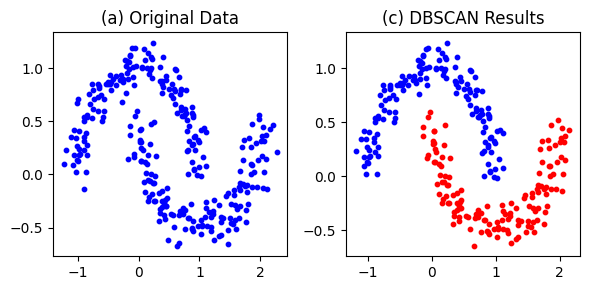

In [3]:
# 데이터 시각화

# 예시 데이터 생성 : 반달 모양 데이터 (강의자료와 동일한 시각화를 위해)
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# DBSCAN 파라미터 설정 및 실행
eps = 0.2   # 엡실론 값
MinPts = 5  # 최소 포인트 수
cluster_result = dbscan(X, eps, MinPts)
print('클러스터링 결과 : ', cluster_result)

# 시각화
plt.figure(figsize=(6, 3))

# original data 시각화
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], color='blue', s=10)
plt.title('(a) Original Data')

# DBCAN 알고리즘 적용한 data 시각화
plt.subplot(122)
colors = ['red', 'blue']
for i, cluster in enumerate(cluster_result):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i % len(colors)], s=10)
plt.title('(c) DBSCAN Results')

plt.tight_layout()
plt.show()